# Лабораторная работа 8. Построение пайплайна полиномиальной регрессии

## Подключение библиотек

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Загрузка данных и разделение на матрицу признаков и зависимую переменную

In [14]:
dataset = pd.read_csv('/content/data8.csv')
dataset.head()

,text,phone,numberrange
0,Orson Huffman,89158481,14
1,Kato Mccarthy,47474832,6
2,Zelenia Fuentes,15042153,11
3,Veda Peters,38572895,1
4,Malachi Beach,64410961,10


In [15]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[89158481]
 [47474832]
 [15042153]
 [38572895]
 [64410961]]
Зависимая переменная
[14  6 11  1 10]


## Обработка пропущенных значений

In [16]:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])
# print(X)

## Обработка категориальных данных

### Замена категории кодом (LabelEncoder)

In [8]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder_y = LabelEncoder()
# print("Зависимая переменная до обработки")
# print(y)
# y = labelencoder_y.fit_transform(y)
# print("Зависимая переменная после обработки")
# print(y)

### Применение OneHotEncoder

In [9]:
# from sklearn.preprocessing import OneHotEncoder
# labelencoder_X = LabelEncoder()
# X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
# onehotencoder = OneHotEncoder(categorical_features = [0])
# X = onehotencoder.fit_transform(X).toarray()
# print("Перекодировка категориального признака")
# print(X)

## Разделение выборки на тестовую и тренировочную

In [10]:
# from sklearn.cross_validation import train_test_split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

## Обучение модели

### Обучение линейной модели

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

### Обучение полиномиальной модели

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Предсказание, обработка и визуализация результатов

[7.67740007] [7.43283121]


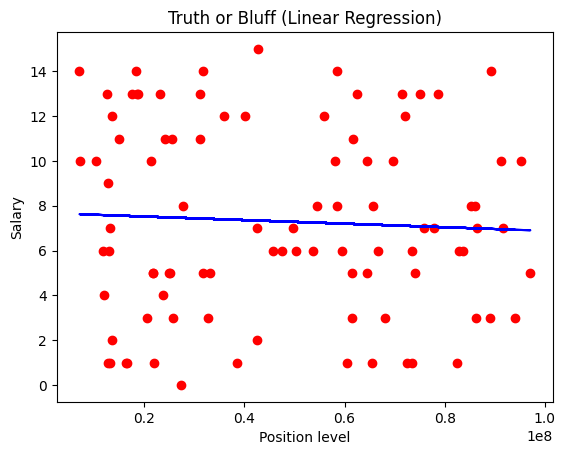

In [19]:
y_pred_lin = lin_reg.predict([[6.5]])
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

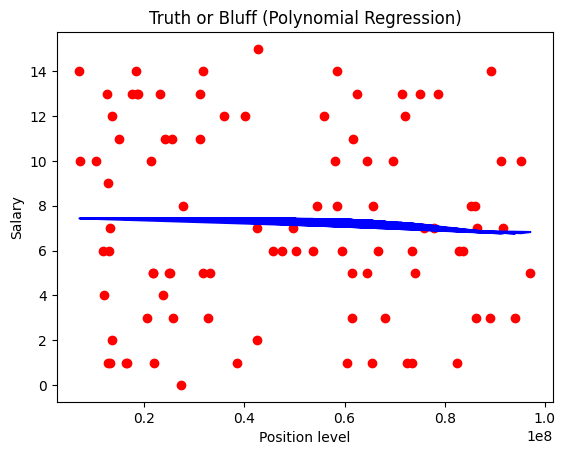

In [20]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()